In [1]:
import sys

import numpy as np
import matplotlib.pyplot as plt
import cv2

# Add src to path
sys.path.append('src')
from BWImage import BWImage
from GeometricTransforms import translate
from GeometricTransforms import rotate
from GeometricTransforms import scale

## Jupyter notebooks settings.

# Reload modules before executing each cell.
%load_ext autoreload
%autoreload 2 

# Print all print statements.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 

In [2]:
# Set white as color for pixels with no value.
BWImage.blank_value = 255 

# Introduction

#### Common procedures
* In below Geometric transformations, the size of the output images have been set appropriately to avoid cropping of the images.
* The image was tranformed from target to source, i.e., for each target pixel the value was obtained from the corresponding postion of the source image. 
* When the position in the source image is not an integer, bilinear interpolation was used.

#### Implementations
* `BWImage` class contains the code for storing an image as numpy array and associated methods. In particular, it contains the method for bilinear interpolation.
* `GeometricTransforms.py` file contains functions for performing the three geometric transformations in the problem statement.

#### Output
* The source and target images are plotted side-by-side.
* The target images are also stored in `data\output` folder.

# Results

### 1. Translation

Text(0.5, 1.0, 'Source image')

Text(0.5, 1.0, 'Target image')

True

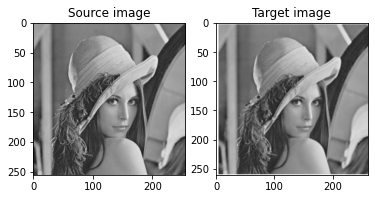

In [3]:
# Read source image.
source = BWImage(cv2.imread('data/input/lena_translate.png'))

# Create a blank target image.
target = BWImage()
xdim, ydim = source.shape()
target.make_blank((xdim + 5, ydim + 5))

# Copy post-translation pixel values to target image.
translate(source, target, 3.75, 4.3)

# Plot the two images.
fig, axs = plt.subplots(1, 2)
axs[0].imshow(source.get_image())
axs[0].set_title("Source image")
axs[1].imshow(target.get_image())
axs[1].set_title("Target image")

# Save the target image.
cv2.imwrite('data/output/lena_translate.png', target.get_image())

* To obtain the position in the source image that corresponds to the pixel (i, j) in the target image the following formula was used.
$$target(i, j) = source(i -t_x, j - t_y)$$
* Here $t_x = 3.75$ and $t_y = 4.3$.

### 2. Rotation

Text(0.5, 1.0, 'Source image')

Text(0.5, 1.0, 'Target image')

True

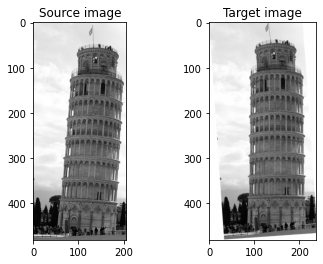

In [4]:
# Read source image.
source = BWImage(cv2.imread('data/input/pisa_rotate.png'))

# Create a blank target image.
target = BWImage()
target.make_blank((source.shape()[0], source.shape()[1] + 30))

# Rotate anti-clockwise by 4 degrees.
rotate(source, target, 4)

# Plot the two images.
fig, axs = plt.subplots(1, 2)
axs[0].imshow(source.get_image())
axs[0].set_title("Source image")
axs[1].imshow(target.get_image())
axs[1].set_title("Target image")

# Save the target image.
cv2.imwrite('data/output/pisa_rotate.png', target.get_image())

* I rotated the image by 4 degrees to make the tower vertical.
* Rotation was performed with the following formula:
$$target(i, j) =  source(R^T(i, j))$$
where $R$ is the rotation matrix given as $R = [[\cos\theta, -\sin\theta], [\sin\theta, \cos\theta]]$

### 3. Scaling

Text(0.5, 1.0, 'Source image')

Text(0.5, 1.0, 'Target image')

True

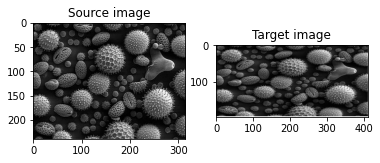

In [5]:
# Read source image.
source = BWImage(cv2.imread('data/input/cells_scale.png'))

# Create a blank target image.
target = BWImage()
target.make_blank((int(source.shape()[0] * 0.81), int(source.shape()[1] * 1.31)))

# Scale the image as per the requirement in the problem statement.
scale(source, target, 0.8, 1.3)

# Plot the two images.
fig, axs = plt.subplots(1, 2)
axs[0].imshow(source.get_image())
axs[0].set_title("Source image")
axs[1].imshow(target.get_image())
axs[1].set_title("Target image")

# Save the target image.
cv2.imwrite('data/output/cells_scale.png', target.get_image())

* The scaling was performed with the following formula:
$$target(i, j) = source(i / s_x, j / s_y)$$
* Here $s_x = 0.8$ and $s_y = 1.3$.